In [1]:
import numpy as np
import sys
from scipy import linalg as sLA
from qiskit import *
from qiskit.circuit import Gate
from qiskit.quantum_info import Statevector
from IPython.core.interactiveshell import InteractiveShell
from qiskit import Aer
from qiskit.providers.aer import QasmSimulator,aer_simulator
from IPython.display import display, Latex
import qiskit.quantum_info as qi
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import pandas as pd
from qiskit.test.mock import FakeMelbourne


from qiskit.visualization import *

InteractiveShell.ast_node_interactivity = "all"
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

\begin{equation}
\exp(-i\theta \sigma_z \otimes \sigma_z) =\rm{CNOT} (I\otimes \exp(-i\sigma_z \theta)) \rm{CNOT}
\end{equation}

In [2]:
# create Pauli to test commutations
def X():
    return np.array([[0,1],[1,0]])
def Y(): 
    return np.array([[0,-1.j],[1.j,0]])
def Z():
    return np.array([[1,0],[0,-1]])
def splus():
    return 0.5*( X()+1.0j*Y() )
def sminus():
    return 0.5*( X()-1.0j*Y() )

'\\documentclass[border=2px]{standalone}\n        \n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document} \n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{ {q}_{0} :  } & \\lstick{ {q}_{0} :  } & \\qw & \\qw & \\qw\\\\ \n\t \t\\nghost{ {q}_{1} :  } & \\lstick{ {q}_{1} :  } & \\gate{\\mathrm{X}} & \\qw & \\qw\\\\ \n\t \t\\nghost{c:} & \\lstick{c:} & \\lstick{/_{_{2}}} \\cw & \\cw & \\cw\\\\ \n\\\\ }}\n\\end{document}'

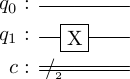

Operator([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0]])

True

In [3]:
circ = QuantumCircuit(2,2)
circ.x(1)
circ.draw(output='latex_source')
circ.draw('latex')
A=qi.Operator(circ)
B=np.kron( [[0,1],[1,0]],[[1,0],[0,1]] ) # X \otimes I
A
B
np.allclose(A,B)

In [4]:
# Use Aer's qasm_simulator
simulator = QasmSimulator()

circ2 = QuantumCircuit(2,2)
circ2.cx(0,1)
#circ2.draw()

circ2.measure([0,1],[0,1])
#qi.Operator(circ2)



<IPython.core.display.Latex object>


Total count for 00 and 11 are: {'00': 1000}


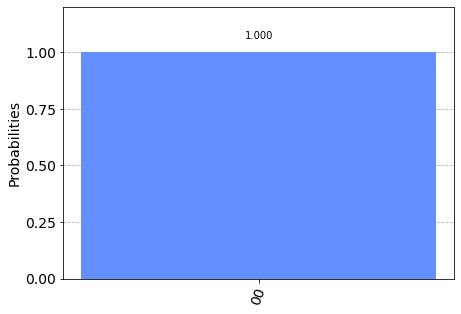

┌─┐   
q_0: ─────■─────┤M├───
     ┌────┴────┐└╥┘┌─┐
q_1: ┤ Rx(π/4) ├─╫─┤M├
     └─────────┘ ║ └╥┘
c: 2/════════════╩══╩═
                 0  1

In [5]:

# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)



# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.crx(np.pi/4,0, 1)
Q=qi.Operator(circuit)


array_to_latex(Q)


# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)
plot_histogram(counts)
# Draw the circuit
circuit.draw()

## CNOT Gate: Check the convention of QISKIT

In [6]:
a=QuantumCircuit(2,2)
a.cx(0,1)
A=qi.Operator(a)
A=np.array(A)
A


qis_zero=np.array([1,0])
display(Latex(f'$|0>={qis_zero}$'))
qis_one=np.array([0,1])
display(Latex(f'$|1>={qis_one}$'))

qis_zz=np.kron(qis_zero,qis_zero)
display(Latex(f'$|00>={qis_zz}$'))
B=np.array([1,0,0,0])
C=A@(B.T)
display(Latex(f'CNOT$|00>={C}$'))


qis_oz=np.kron(qis_one,qis_zero)
display(Latex(f'$|10>={qis_oz}$'))
B=np.array([0,0,1,0])
C=A@(B.T)
display(Latex(f'CNOT$|10>={C}$'))


qis_zo=np.kron(qis_zero,qis_one)
display(Latex(f'$|10>={qis_zo}$'))
B=np.array([0,1,0,0])
C=A@(B.T)
display(Latex(f'CNOT$|10>={C}$'))


qis_oo=np.kron(qis_one,qis_one)
display(Latex(f'$|11>={qis_oo}$'))
B=np.array([0,0,0,1])
C=A@(B.T)
display(Latex(f'CNOT$|11>={C}$'))



array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Circuit block create
Lets total Trotter step is $n$ with trotter step interval is $\delta t$
First term

$$ \exp(-\frac{i}{2} \sigma_1(x) \sigma_1(x+1) \theta )$$

where, $\theta =\delta t/n$.

In [7]:
delta_t=0.1
n=40
Gsqr=1**2
my_halftheta= delta_t/n
my_theta= 2*my_halftheta

print("Z axis rotation phase",my_theta)

N=2
print("site",N)
Q=4
print("total qubit",Q)

Z axis rotation phase 0.005
site 2
total qubit 4


# Two qubit gate create: $\exp (i \theta \sigma_z \otimes \sigma_z) = \rm{CNOT}. (I\otimes R_z) .\rm{CNOT}$

In [8]:
def exp_sz_sz(circ,qc,qt,my_theta):
    
    assert  qc < (circ.width()) and qt < (circ.width()),\
           "control bit or target bit index greater than total qubit"
    assert qc !=qt, "control bit and target bit cannot be same"
   
    circ.cx(qc, qt)
    circ.rz(my_theta,qt)
    circ.cx(qc,qt)
    
    return circ

total qubit: 2
depth of the quantum circuit:  3
gate counts of different types:  OrderedDict([('cx', 2), ('rz', 1)])
total number of operations: 3


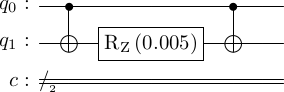

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

verify the operator with scipy linalg


<IPython.core.display.Latex object>

In [9]:
Q=2
circ0 = QuantumCircuit(Q,Q)

circ0=exp_sz_sz(circ0,0,1,my_theta)

print("total qubit:", circ0.num_qubits) # circ.width() also gives the number of qubits
print("depth of the quantum circuit: ",circ0.depth())
print("gate counts of different types: ", circ0.count_ops() )
print("total number of operations:",circ0.size())

circ0.draw('latex')

myH0=qi.Operator(circ0)
display(Latex(f'$\exp(-i/2 \, \\theta \, \sigma_z \otimes \sigma_z)$'))

array_to_latex(myH0)
print("verify the operator with scipy linalg")
myH0b=sLA.expm(-1.0j *my_theta/2*np.kron(Z(),Z()) )
array_to_latex(myH0b)

# Two qubit gate create: $\exp (i \theta \sigma_x \otimes \sigma_x) = (\rm{H} \otimes H) .\rm{CNOT}. (I\otimes R_z) .\rm{CNOT}. (H\otimes H)$

###  $ H \sigma_z H = \sigma_x$

In [10]:
def myH():
    return np.array([[1/np.sqrt(2),1/np.sqrt(2)],[1/np.sqrt(2),-1/np.sqrt(2)]])

assert np.allclose(myH() @ Z() @ myH(), X()), "basis change failed"

### $R_x (\pi/2)\sigma_z R_x^\dagger (\pi/2) = R_x (\pi/2)\sigma_z R_x(-\pi/2) =\sigma_y$,  $R_x R_x^\dagger=1$

In [11]:
def myRx(x):
    return sLA.expm(1.0j * x/2 * X() )

rx1=myRx(np.pi/2)
array_to_latex(rx1)
rx2=myRx(-np.pi/2)

np.allclose(np.conjugate(rx1.T),rx2)
assert np.allclose(rx1 @ Z() @ np.conjugate(rx1.T), Y() ) , "basis change not successful"


np.allclose(rx1 @ rx2,np.eye(2) )


<IPython.core.display.Latex object>

True

True

In [12]:
def exp_sx_sx(circ,qc,qt,my_theta):
    
    assert  qc < (circ.width()) and qt < (circ.width()),\
           "control bit or target bit index greater than total qubit"
    assert qc !=qt, "control bit and target bit cannot be same"
    circ.h(qc)
    circ.h(qt)
    circ.cx(qc, qt)
    circ.rz(my_theta,qt)
    circ.cx(qc,qt)
    circ.h(qc)
    circ.h(qt)
    return circ




In [13]:
# define initial state of a qubit
############### If initialization is performed, qi.operator() won't work
#initial_state0 = [1,0]   # Define initial_state for 0th qubit as |1>
#circ.initialize(initial_state0, 0) # Apply initialisation operation to the 0th qubit
#initial_state1 = [1,0]   # Define initial_state 1th qubit as |0>
#circ.initialize(initial_state1, 1) # Apply initialisation operation to the 1th qubit

total qubit: 2
depth of the quantum circuit:  5
gate counts of different types:  OrderedDict([('h', 4), ('cx', 2), ('rz', 1)])
total number of operations: 7


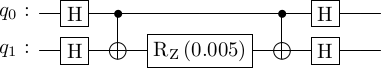

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

verify the operator with scipy linalg


<IPython.core.display.Latex object>

In [14]:

# Create a Quantum Circuit acting on a quantum register of Q qubits
Q=2
circ = QuantumCircuit(Q)

circ=exp_sx_sx(circ,0,1,my_theta)

print("total qubit:", circ.num_qubits) # circ.width() also gives the number of qubits
print("depth of the quantum circuit: ",circ.depth())
print("gate counts of different types: ", circ.count_ops() )
print("total number of operations:",circ.size())

circ.draw('latex',filename='exp_sz_sz.png')

myH=qi.Operator(circ)
display(Latex(f'$\exp(-i/2 \, \\theta \, \sigma_x \otimes \sigma_x)$'))

array_to_latex(myH)
print("verify the operator with scipy linalg")
myH2=sLA.expm(-1.0j *my_theta/2*np.kron(X(),X()) )
array_to_latex(myH2)
#myH3=np.cos(my_theta/2)*np.eye(4) -1.0j* np.sin(my_theta/2) *np.kron(X(),X())
#array_to_latex(myH3)


###  Two qubit gate create: $\exp (i \theta \sigma_y \otimes \sigma_y)= (\rm{R_y(\pi/2)} \otimes \rm{R_y(\pi/2)}) .\rm{CNOT}. (I\otimes R_z) .\rm{CNOT}. ((\rm{R_y^\dagger(\pi/2)} \otimes \rm{R_y^\dagger(\pi/2)}) )$

In [15]:
def exp_sy_sy(circ,qc,qt,my_theta):
    
    assert  qc < (circ.width()) and qt < (circ.width()),\
           "control bit or target bit index greater than total qubit"
    assert qc !=qt, "control bit and target bit cannot be same"
    circ.rx(np.pi/2,qc)
    circ.rx(np.pi/2,qt)
    circ.cx(qc, qt)
    circ.rz(my_theta,qt)
    circ.cx(qc,qt)
    circ.rx(-np.pi/2,qc)
    circ.rx(-np.pi/2,qt)
    return circ


In [16]:
def exp_sx_sy(circ,qc,qt,my_theta):
    
    assert  qc < (circ.width()) and qt < (circ.width()),\
           "control bit or target bit index greater than total qubit"
    assert qc !=qt, "control bit and target bit cannot be same"
    circ.h(qc)
    circ.rx(np.pi/2,qt)
    circ.cx(qc, qt)
    circ.rz(my_theta,qt)
    circ.cx(qc,qt)
    circ.h(qc)
    circ.rx(-np.pi/2,qt)
    return circ

In [17]:
def exp_sy_sx(circ,qc,qt,my_theta):
    
    assert  qc < (circ.width()) and qt < (circ.width()),\
           "control bit or target bit index greater than total qubit"
    assert qc !=qt, "control bit and target bit cannot be same"
    circ.rx(np.pi/2,qc)
    circ.h(qt)
    circ.cx(qc, qt)
    circ.rz(my_theta,qt)
    circ.cx(qc,qt)
    circ.rx(-np.pi/2,qc)
    circ.h(qt)
    return circ

total qubit: 2
depth of the quantum circuit:  5
gate counts of different types:  OrderedDict([('rx', 4), ('cx', 2), ('rz', 1)])
total number of operations: 7


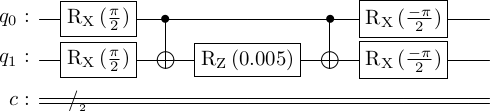

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

verify the operator with scipy linalg


<IPython.core.display.Latex object>

In [18]:
# Create a Quantum Circuit acting on a quantum register of Q qubits
Q=2
circ1 = QuantumCircuit(Q,Q)

circ1=exp_sy_sy(circ1,0,1,my_theta)

print("total qubit:", circ1.num_qubits) # circ.width() also gives the number of qubits
print("depth of the quantum circuit: ",circ1.depth())
print("gate counts of different types: ", circ1.count_ops() )
print("total number of operations:",circ1.size())

circ1.draw('latex')

myH1=qi.Operator(circ1)
display(Latex(f'$\exp(-i/2 \, \\theta \, \sigma_y \otimes \sigma_y)$'))

array_to_latex(myH1)
print("verify the operator with scipy linalg")
myH1b=sLA.expm(-1.0j *my_theta/2*np.kron(Y(),Y()) )
array_to_latex(myH1b)

total qubit: 2
depth of the quantum circuit:  5
gate counts of different types:  OrderedDict([('h', 2), ('rx', 2), ('cx', 2), ('rz', 1)])
total number of operations: 7


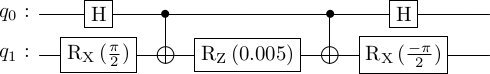

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

verify the operator with scipy linalg


<IPython.core.display.Latex object>

In [19]:
# Create a Quantum Circuit acting on a quantum register of Q qubits
Q=2
circ1 = QuantumCircuit(Q)

circ1=exp_sx_sy(circ1,0,1,my_theta)

print("total qubit:", circ1.num_qubits) # circ.width() also gives the number of qubits
print("depth of the quantum circuit: ",circ1.depth())
print("gate counts of different types: ", circ1.count_ops() )
print("total number of operations:",circ1.size())

circ1.draw('latex',filename='exp_sx_sy.png')

myH1=qi.Operator(circ1)
display(Latex(f'$\exp(-i/2 \, \\theta \, \sigma_x \otimes \sigma_y)$'))

array_to_latex(myH1)
print("verify the operator with scipy linalg")
myH1b=sLA.expm(-1.0j *my_theta/2*np.kron(Y(),X()) )
array_to_latex(myH1b)

# SO(4) Hamiltonian
Hamiltonian in $\sigma_{x,y}$
\begin{align}
H&=-\frac{1}{2}  \sum_{x=1}^{N-1} \Bigg( \sigma_1(x)\sigma_2(x+1)-\sigma_2(x)\sigma_1(x+1)
+\tau_1(x)\tau_2(x+1) -\tau_2(x)\tau_1(x+1)   \Bigg) \\
&+ \frac{G^2}{4} \sum_{x=1}^{N}  \Bigg( I - \sigma_3(x)- \tau_3(x)+ \sigma_3(x)\tau_3(x)\Bigg) 
\end{align}

Trotterized Hamiltonian

$$ e^{-i H t} \approx\left( e^{-i A t / n} e^{-i B t / n} e^{-iC t / n} e^{-i D t / n} e^{-iE t / n} e^{-iF t / n} e^{-iG t / n}     \right) ^n$$


\begin{align}
A= \sigma_1(x) \sigma_2(x+1) , \quad \theta_1 = -t/n \\
B= \sigma_2(x) \sigma_1(x+1) , \quad \theta_2 = \, t/n\\
C= \tau_1(x) \tau_2(x+1) , \quad \theta_3 = - t/n \\
D= \tau_2(x) \tau_1(x+1) , \quad \theta_4 =  t/n \\
E= \sigma_3(x), \quad \theta_5 = -\frac{G^2t}{2n}\\
A= \tau_3(x) , \quad \theta_6 = -\frac{G^2t}{2n}\\
A= \sigma_3(x) \tau_3(x) , \quad \theta_7 = \frac{G^2t}{2n}\\
\end{align}

In [20]:
def my_measurement():
    simulator=QasmSimulator()
    # Map the quantum measurement to the classical bits
    so_cir.measure([0,1,2,3], [0,1,2,3])
    #so_cir.draw('latex')
    # compile the circuit down to low-level QASM instructions
    # supported by the backend (not needed for simple circuits)
    compiled_circ = transpile(so_cir, simulator)

    # Execute the circuit on the qasm simulator
    job = simulator.run(compiled_circ, shots=50000)

    # Grab results from the job
    result = job.result()

    # Returns counts
    counts = result.get_counts(compiled_circ)
    print("\nTotal count",counts)
    plot_histogram(counts)


site 4
total qubit 8


<IPython.core.display.Latex object>

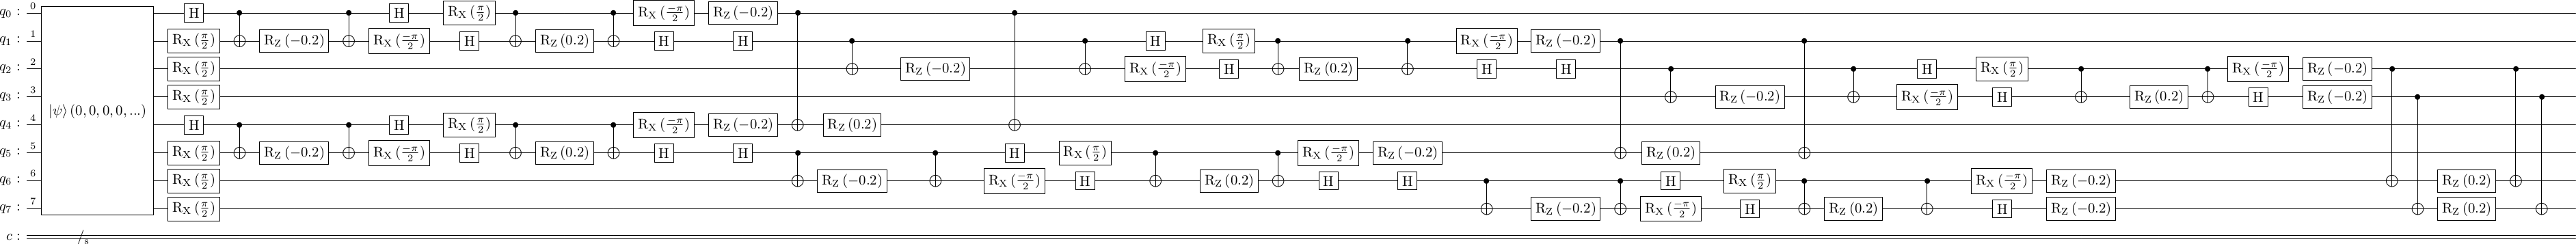

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

<IPython.core.display.Latex object>

'00001110'

In [21]:
N=4
Q=2*N
mmax=2**Q
so_cir = QuantumCircuit(Q,Q)

t=10
n=50
delta_t=t/n
Gsqr=2
theta1=-delta_t
theta2=-Gsqr*delta_t/2

print("site",N)

print("total qubit",Q)

# define initial state of a qubit
############### If initialization is performed, qi.operator() won't work
myzero = [1,0]   
myone = [0,1]   # |1>
SVarr_init=np.zeros(mmax,dtype=np.complex_) 
#|1000> state

inputstring="14"
SVarr_init[int(inputstring)]=1.0

#so_cir.initialize(myzero,0) 
#so_cir.initialize(myzero, 1) 
#so_cir.initialize(myone, 2)
#so_cir.initialize(myone, 3)

#SVarr_init=np.kron(np.kron(np.kron(myzero,myzero),myone),myone)
#SVarr_init=np.kron(np.kron(np.kron(myone,myzero),myzero),myone)
#SVarr_init=np.kron(np.kron(np.kron(myone,myone),myzero),myzero)

SVinit=Statevector(SVarr_init)
so_cir.initialize(SVinit)
array_to_latex(SVinit,max_size=16)

prob=np.array([])
prob2=np.array([])

for i in range(n):
    for q1 in range(N-1):
        q2=q1+1
        so_cir=exp_sx_sy(so_cir,q1,q2,theta1)
        so_cir=exp_sy_sx(so_cir,q1,q2,-theta1)
        so_cir=exp_sx_sy(so_cir,q1+N,q2+N,theta1)
        so_cir=exp_sy_sx(so_cir,q1+N,q2+N,-theta1)

        so_cir.rz(theta2,q1)
        so_cir.rz(theta2,q1+N)
        so_cir=exp_sz_sz(so_cir,q1,q1+N,-theta2)


    so_cir.rz(theta2,N-1)
    so_cir.rz(theta2,2*N-1)
    so_cir=exp_sz_sz(so_cir,N-1,2*N-1,-theta2)
    
    
    if i==0:
        so_cir.draw('latex',filename='so4_one_Trotter.png')
        
    
    # computer probability after each Trotter step
    temp=so_cir.copy(name='temp')
    #so_cir.draw('latex')
    temp.save_statevector()
    simulator=QasmSimulator()
    # Map the quantum measurement to the classical bits
    temp.measure([0,1,2,3], [0,1,2,3])

    #so_cir.draw('latex')
    # compile the circuit down to low-level QASM instructions
    # supported by the backend (not needed for simple circuits)
    compiled_circ = transpile(temp, simulator)
    # Execute the circuit on the qasm simulator
    job = simulator.run(compiled_circ, shots=500) #,memory=True)

    # Grab results from the job
    result = job.result()
    SV_arr=result.get_statevector()
    
    SV=Statevector(SV_arr )
    array_to_latex(SV,max_size=16)
    #np.conj(SV_arr.T)@ SV_arr 

    psiHpsi= np.conj(SVarr_init.T) @ SV_arr
    #print(np.conj(SVarr_init.T), SV_arr)

    prob=np.append(prob,np.conj(psiHpsi) * psiHpsi)
    
    
    count=result.get_counts()
    
    #print(count)
    mykeys=list(count.keys())
    myvals = [count[key] for key in count.keys()]

    #print(myvals,np.sum(myvals))
    #print(mykeys)
    mybitstring=bin(int(inputstring)).replace("0b", "")
    mybitstring=mybitstring.zfill(Q)
    mybitstring
    
    for k in mykeys:
        if mybitstring==k:
            tempprob=count[k]/np.sum(myvals)
            prob2=np.append(prob2,tempprob)
            break


            

Text(0, 0.5, '$|\\langle \\psi| \\mathrm{e}^{iHt} | \\psi \\rangle |^2 $')

Text(0.5, 0, '$t$')

Text(0.13, 0.9, '$L$=4')

Text(0.13, 0.8, '$Q$=8')

Text(0.13, 0.7, '$G^2$=2.0')

Text(0.13, 0.6, '$\\delta t$=0.2')

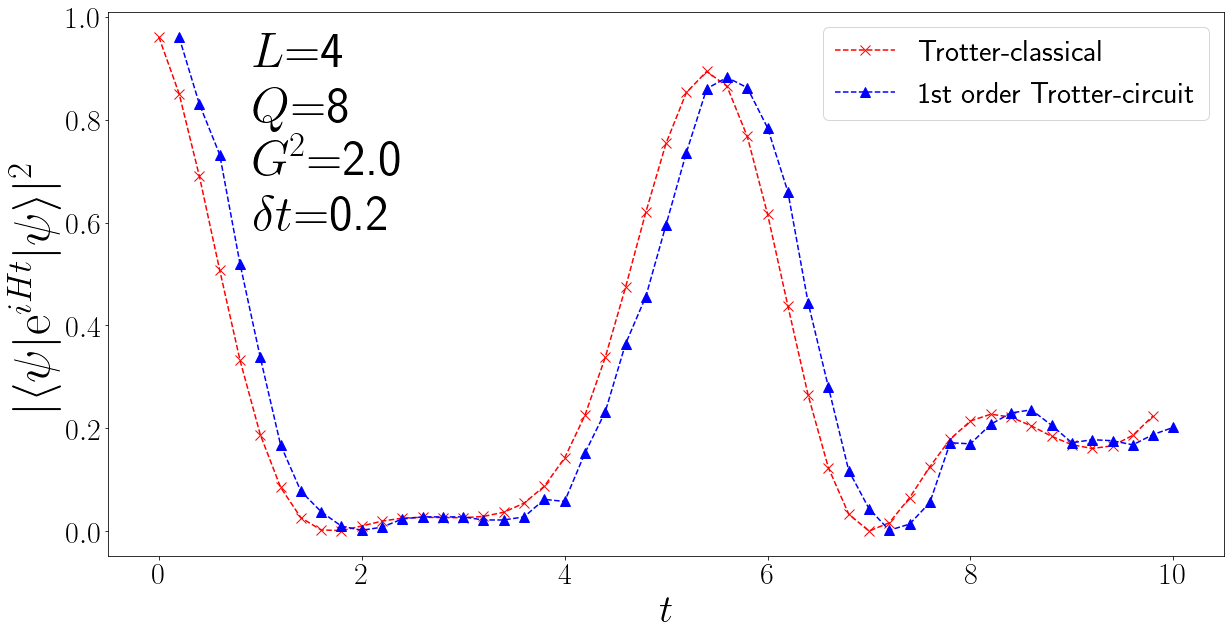


Total count {'00000111': 28, '00001101': 45, '00001011': 326, '00001110': 101}


In [25]:
data_str="112"
X=np.array(pd.read_csv("L"+str(N)+"_data_Trotter_"+data_str,sep='\t',index_col=False, header=None))

#print(X)
#print(prob)
#so_cir.draw()
plt.rc('text',usetex=True)
fig, ax = plt.subplots(facecolor='w',figsize=(20,10))
ax.tick_params(axis='both', which='major', labelsize=30)

plt.plot(X[:,0],X[:,1],'xr',ls='--',ms=10,label='Trotter-classical')
plt.plot( delta_t* (np.arange(len(prob2))+1) , prob2,'^b',ls='--',ms=10,label='1st order Trotter-circuit')
plt.ylabel(r'$|\langle \psi| \mathrm{e}^{iHt} | \psi \rangle |^2 $',fontsize=50)
plt.xlabel(r'$t$',fontsize=40)
plt.legend(loc='best',fontsize=30)
plt.annotate(r'$L$=%d'%N , xy=(0.13, 0.9), xycoords='axes fraction',fontsize=50)
plt.annotate(r'$Q$=%d'%Q , xy=(0.13, 0.8), xycoords='axes fraction',fontsize=50)
plt.annotate(r'$G^2$=%0.1f'%Gsqr , xy=(0.13, 0.7), xycoords='axes fraction',fontsize=50)
plt.annotate(r'$\delta t$=%0.1f'%delta_t , xy=(0.13, 0.6), xycoords='axes fraction',fontsize=50)
plt.savefig('qm_Trotterclassical'+inputstring+'_500shots.png',bbox_inches='tight')
plt.show()
plt.close()

# Returns counts
counts = result.get_counts(compiled_circ)
print("\nTotal count",counts)
#plot_histogram(counts)

#result.get_memory(compiled_circ)
